In [1]:
#imports
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

#import data
bridges_pandas = pd.read_csv("pittsburgh-city-bridges.csv", index_col="id")
#eliminate irrelevant columns
bridges_pandas = bridges_pandas[["start_neighborhood", "end_neighborhood"]]

In [2]:
#initiate a series of the number of bridges starting in each neighborhood
start = bridges_pandas["start_neighborhood"].value_counts() 
#initiate a series of the number of bridges ending in each neighborhood
end = bridges_pandas["end_neighborhood"].value_counts()

In [3]:
def filter_less_than (x, threshold):
    for i in x.Total_Bridges:
        if i > threshold:
            return True
        else:
            return False
#combine the two series and their values
#this series contains the number of bridges that 
#either start or end in each neighborhood
full = start.add(end, fill_value = 0)
#translate back to DataFrame for filtering
full_frame = pd.DataFrame({"Neighborhood":full.index
                           , "Total_Bridges":full.values})
#filter out neighborhoods with <4 bridges
filtered = full_frame.groupby("Neighborhood").filter(filter_less_than
                                                     , threshold = 4)
#turn the DataFrame into a Series to get rid of excess numbers
filtered_ser = pd.Series(filtered["Total_Bridges"].values
                         , index=filtered["Neighborhood"])
print(filtered_ser)

Neighborhood
Central Business District     7.0
Hays                          5.0
Hazelwood                     5.0
Oakwood                       5.0
Polish Hill                   5.0
Shadyside                     8.0
South Oakland                 8.0
South Side Flats              9.0
South Side Slopes             8.0
Squirrel Hill South          20.0
Troy Hill                     8.0
dtype: float64


<AxesSubplot:title={'center':'Number of Bridges In The 11 Neighborhoods With The Most Bridges'}, xlabel='Neighborhood'>

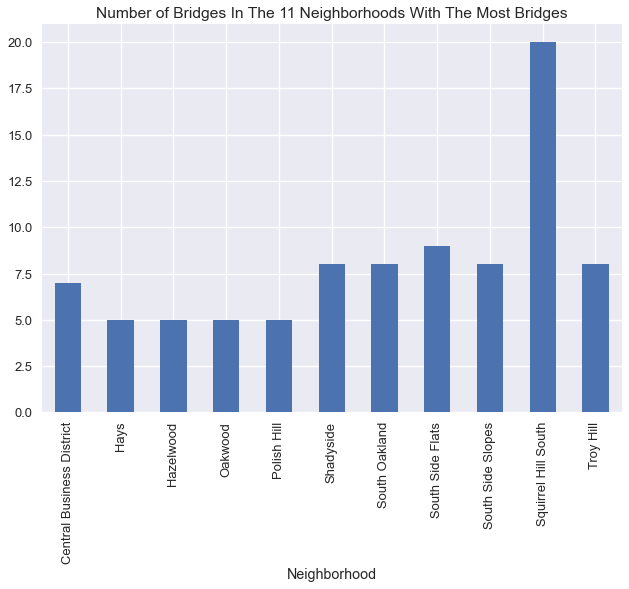

In [7]:
#plot and label (bar graphs cannot label y-axis)
plt.style.use('seaborn')
plt.style.use('seaborn-talk')
filtered_ser.plot(kind='bar', x='Neighborhood'
                  , title="Number of Bridges In The 11 Neighborhoods With The Most Bridges")

In [5]:
#geopandas experimenting
import geopandas

<AxesSubplot:>

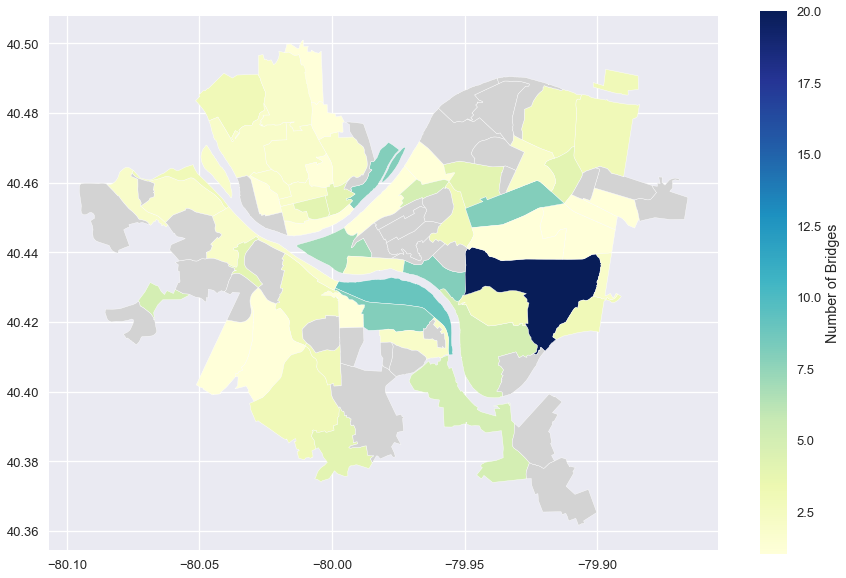

In [6]:
#create, name, and sort a series based on full_
num_bridges = pd.Series(full_frame["Total_Bridges"].values
                         , index=full_frame["Neighborhood"]
                         , name='number_of_bridges')
num_bridges = num_bridges.sort_values(ascending=False)
#import shapefile
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp")
#merge
bridges_map = neighborhoods.merge(num_bridges, how='left', left_on='hood', right_on='Neighborhood')
#plot the map
bridges_map.plot(column='number_of_bridges', # set the data to be used for coloring
               cmap='YlGnBu',              #color palette
               edgecolor="white",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "Number of Bridges"}, # label the legend
               figsize=(15, 10),         # set the size
               missing_kwds={"color": "lightgrey"} # set disctricts with no data to gray
               )